#Chicago Crimes EDA

Objective:To Explore the data and find insights

Data Dictionary:

ID


Case Number

Date

Block

IUCR

Primary Type

Description

Location Description

Arrest

Domestic

Beat

District

Ward

Community Area

FBI Code

X Coordinate

Y Coordinate

Year

Updated On

Latitude

Longitude

Location

In [1]:
import pandas as pd            # Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('/content/2Crimes_-_2001_to_Present_20231103.csv.crdownload')        # Load the dataset

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015.0,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014.0,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426615 entries, 0 to 2426614
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  float64
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(8), int64(2), object(1

In [5]:
df.shape

(2426615, 22)

In [6]:
df.size

53385530

In [7]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                    float64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [8]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2426615.0,7.135843e+06,3.928902e+06,634.000000,4.753180e+06,5.795494e+06,1.235042e+07,1.326269e+07
Beat,2426615.0,1.188459e+03,7.058760e+02,111.000000,6.210000e+02,1.034000e+03,1.732000e+03,2.535000e+03
District,2426578.0,1.127728e+01,6.974169e+00,1.000000,6.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,2134559.0,2.271476e+01,1.384751e+01,1.000000,1.000000e+01,2.200000e+01,3.400000e+01,5.000000e+01
Community Area,2135425.0,3.759660e+01,2.163260e+01,0.000000,2.300000e+01,3.200000e+01,5.700000e+01,7.700000e+01
X Coordinate,2392156.0,1.164763e+06,1.684667e+04,0.000000,1.153224e+06,1.166314e+06,1.176502e+06,1.205119e+06
Y Coordinate,2392155.0,1.885718e+06,3.233985e+04,0.000000,1.858868e+06,1.890117e+06,1.909360e+06,1.951532e+06
Year,2426614.0,2.010610e+03,7.661295e+00,2001.000000,2.006000e+03,2.007000e+03,2.021000e+03,2.023000e+03
Latitude,2392155.0,4.184200e+01,8.896831e-02,36.619446,4.176812e+01,4.185407e+01,4.190698e+01,4.202264e+01
Longitude,2392155.0,-8.767090e+01,6.105190e-02,-91.686566,-8.771275e+01,-8.766512e+01,-8.762788e+01,-8.752453e+01


In [10]:
df.describe(include=[np.object]).T

<ipython-input-10-8b4509b3963c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object]).T


,count,unique,top,freq
Case Number,2426615,2426068,HJ590004,6
Date,2426615,1096726,01/01/2021 12:00:00 AM,142
Block,2426615,57655,100XX W OHARE ST,7213
IUCR,2426615,390,0460,181378
Primary Type,2426615,34,THEFT,486301
Description,2426615,514,SIMPLE,296264
Location Description,2421654,212,STREET,667450
FBI Code,2426615,27,06,486301
Updated On,2426614,3652,02/28/2018 03:56:25 PM,1027529
Location,2392155,595339,"(41.976290414, -87.905227221)",5933


# Checking the null values

In [11]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      4961
Arrest                       0
Domestic                     0
Beat                         0
District                    37
Ward                    292056
Community Area          291190
FBI Code                     0
X Coordinate             34459
Y Coordinate             34460
Year                         1
Updated On                   1
Latitude                 34460
Longitude                34460
Location                 34460
dtype: int64

In [12]:
null_pct=(df.isnull().sum())/df.shape[0]

In [13]:
null_pct

ID                      0.000000e+00
Case Number             0.000000e+00
Date                    0.000000e+00
Block                   0.000000e+00
IUCR                    0.000000e+00
Primary Type            0.000000e+00
Description             0.000000e+00
Location Description    2.044412e-03
Arrest                  0.000000e+00
Domestic                0.000000e+00
Beat                    0.000000e+00
District                1.524758e-05
Ward                    1.203553e-01
Community Area          1.199984e-01
FBI Code                0.000000e+00
X Coordinate            1.420044e-02
Y Coordinate            1.420085e-02
Year                    4.120967e-07
Updated On              4.120967e-07
Latitude                1.420085e-02
Longitude               1.420085e-02
Location                1.420085e-02
dtype: float64

In [14]:
df.dropna(inplace=True)            # Dropping the null values using dropna function

In [15]:
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [89]:
df['Location'].value_counts()

(41.976290414, -87.905227221)    5933
(41.754592961, -87.741528537)    2539
(41.883500187, -87.627876698)    1983
(41.788987036, -87.74147999)     1338
(41.904192368, -87.647000785)    1290
                                 ... 
(41.684216191, -87.703591296)       1
(41.790124661, -87.689211761)       1
(42.012254225, -87.687759201)       1
(41.820999651, -87.726330658)       1
(41.962493843, -87.764577893)       1
Name: Location, Length: 444100, dtype: int64

In [16]:
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11,12045583,JD226426,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,...,3.0,35.0,06,1178180.0,1881621.0,2020.0,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
12,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020.0,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"


In [17]:
df.groupby('Primary Type')['Arrest'].sum().to_frame().reset_index()

,Primary Type,Arrest
0,ARSON,424
1,ASSAULT,25682
2,BATTERY,76283
3,BURGLARY,5991
4,CONCEALED CARRY LICENSE VIOLATION,529
5,CRIM SEXUAL ASSAULT,718
6,CRIMINAL DAMAGE,15120
7,CRIMINAL SEXUAL ASSAULT,213
8,CRIMINAL TRESPASS,35133
9,DECEPTIVE PRACTICE,9539


In [18]:
df[df.duplicated()].sum()

ID                      0.0
Case Number             0.0
Date                    0.0
Block                   0.0
IUCR                    0.0
Primary Type            0.0
Description             0.0
Location Description    0.0
Arrest                  0.0
Domestic                0.0
Beat                    0.0
District                0.0
Ward                    0.0
Community Area          0.0
FBI Code                0.0
X Coordinate            0.0
Y Coordinate            0.0
Year                    0.0
Updated On              0.0
Latitude                0.0
Longitude               0.0
Location                0.0
dtype: float64

In [19]:
df.Year.value_counts()

2006.0    445506
2007.0    434798
2008.0    343141
2022.0    232459
2023.0    210136
2021.0    202025
2005.0    149082
2020.0     66067
2009.0      1629
2019.0      1460
2010.0      1430
2004.0      1376
2011.0      1258
2001.0      1158
2003.0      1082
2016.0       974
2017.0       869
2018.0       831
2002.0       768
2012.0       768
2015.0       668
2014.0       627
2013.0       614
Name: Year, dtype: int64

In [20]:
df.nunique()

ID                      2098726
Case Number             2098193
Date                     956348
Block                     34849
IUCR                        384
Primary Type                 33
Description                 508
Location Description        212
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     27
X Coordinate              69922
Y Coordinate             116806
Year                         23
Updated On                 2767
Latitude                 443777
Longitude                443570
Location                 444100
dtype: int64

In [21]:
df.Arrest.value_counts()

False    1604070
True      494656
Name: Arrest, dtype: int64

In [22]:
df.District.value_counts()

8.0     144365
11.0    128139
6.0     127018
4.0     122560
7.0     119592
25.0    116049
3.0     108710
12.0    107353
9.0     101472
2.0      96590
5.0      94508
19.0     93622
18.0     92092
10.0     88747
15.0     88581
1.0      85873
14.0     76151
16.0     71850
22.0     70048
24.0     67007
17.0     59772
20.0     38548
31.0        79
Name: District, dtype: int64

<Axes: xlabel='Arrest', ylabel='count'>

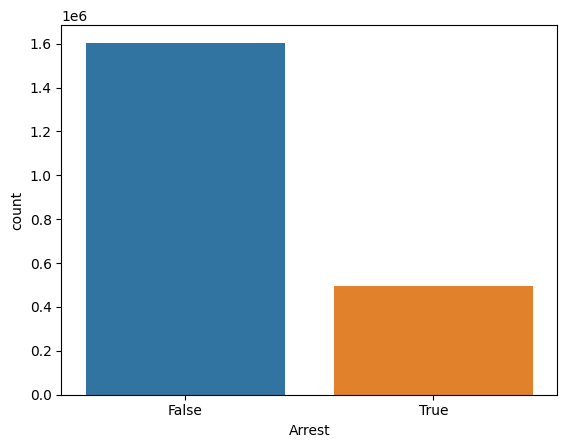

In [23]:
sns.countplot(x='Arrest',data=df)

.We can Observe that Number of Arrest as True is very less compared to False

<Axes: xlabel='District', ylabel='count'>

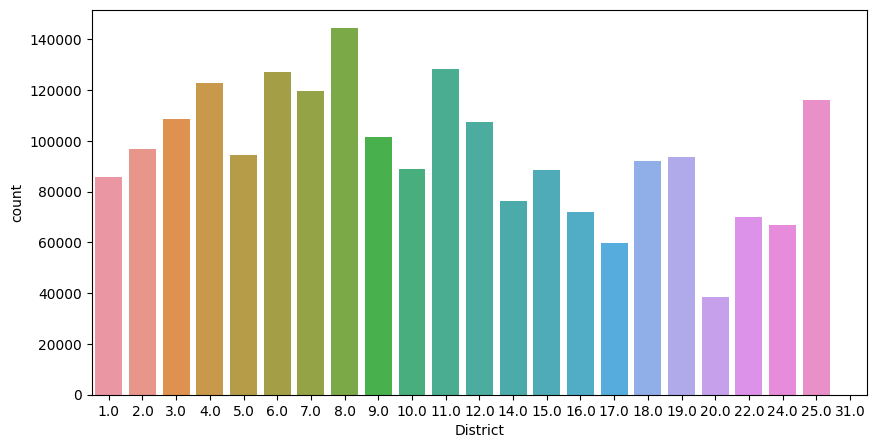

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='District',data=df)

.We can observe that the crime rate for the district 8.0 is the highest.

.We can observe that the crime rate is lowest for the district 20.0.

.Also, we can observe that the crime rate from the districts 1.0 to 11.0 is high compare to the rest of the districts.

In [25]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [27]:
df.Year.dtypes

dtype('float64')

In [28]:
df.Year.value_counts()

2006.0    445506
2007.0    434798
2008.0    343141
2022.0    232459
2023.0    210136
2021.0    202025
2005.0    149082
2020.0     66067
2009.0      1629
2019.0      1460
2010.0      1430
2004.0      1376
2011.0      1258
2001.0      1158
2003.0      1082
2016.0       974
2017.0       869
2018.0       831
2002.0       768
2012.0       768
2015.0       668
2014.0       627
2013.0       614
Name: Year, dtype: int64

In [31]:
df['Year']=df['Year'].astype(int)       # converting the data type of date from float data type to int

In [32]:
df.Year.dtypes

dtype('int64')

In [33]:
df.Year.value_counts()

2006    445506
2007    434798
2008    343141
2022    232459
2023    210136
2021    202025
2005    149082
2020     66067
2009      1629
2019      1460
2010      1430
2004      1376
2011      1258
2001      1158
2003      1082
2016       974
2017       869
2018       831
2002       768
2012       768
2015       668
2014       627
2013       614
Name: Year, dtype: int64

In [46]:
df.Arrest.value_counts()

False    1604070
True      494656
Name: Arrest, dtype: int64

In [48]:
True_Arrest=df[df['Arrest']==True]     # Filtering the Arrest column where Arrest is True

In [49]:
True_Arrest

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
12,12031001,JD209965,04/16/2020 05:00:00 AM,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,...,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
13,12093529,JD282112,07/01/2020 10:16:00 AM,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,...,7.0,46.0,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)"
19,12126129,JD321064,08/04/2020 08:28:00 PM,081XX S LOOMIS BLVD,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,21.0,71.0,15,1168412.0,1850836.0,2020,08/11/2020 03:42:53 PM,41.746221,-87.658477,"(41.746220584, -87.658477307)"
27,12067286,JD251718,06/02/2020 10:00:00 PM,042XX S EMERALD AVE,0820,THEFT,$500 AND UNDER,STREET,True,False,...,11.0,61.0,06,1172009.0,1876708.0,2020,06/09/2020 03:43:29 PM,41.817138,-87.644538,"(41.817138145, -87.644537728)"
28,4229528,HL545852,08/12/2005 11:00:00 PM,063XX S COTTAGE GROVE AVE,3730,INTERFERENCE WITH PUBLIC OFFICER,OBSTRUCTING JUSTICE,SIDEWALK,True,False,...,20.0,42.0,24,1182654.0,1863077.0,2005,02/28/2018 03:56:25 PM,41.779493,-87.605913,"(41.779492755, -87.605912536)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420867,1814701,G645753,10/26/2001 10:00:00 PM,072XX S WABASH AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,True,False,...,6.0,69.0,07,1178014.0,1857075.0,2001,08/17/2015 03:03:40 PM,41.763129,-87.623105,"(41.763129077, -87.623104887)"
2421047,1759690,G572161,09/24/2001 02:15:55 AM,003XX E 80TH ST,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,True,False,...,6.0,44.0,05,1179688.0,1852072.0,2001,08/17/2015 03:03:40 PM,41.749362,-87.617122,"(41.749362201, -87.617122073)"
2421671,1734005,G542580,08/10/2001 12:00:00 PM,0000X E LAKE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER,True,False,...,42.0,32.0,07,1176939.0,1901704.0,2001,03/31/2006 10:03:38 PM,41.885619,-87.625698,"(41.885619056, -87.625697687)"
2424773,1692342,G486901,08/15/2001 11:30:00 PM,035XX N BROADWAY,0610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,True,False,...,46.0,6.0,05,1170978.0,1924042.0,2001,04/07/2018 03:52:33 PM,41.947048,-87.646931,"(41.947048473, -87.646930942)"


<Axes: xlabel='District', ylabel='count'>

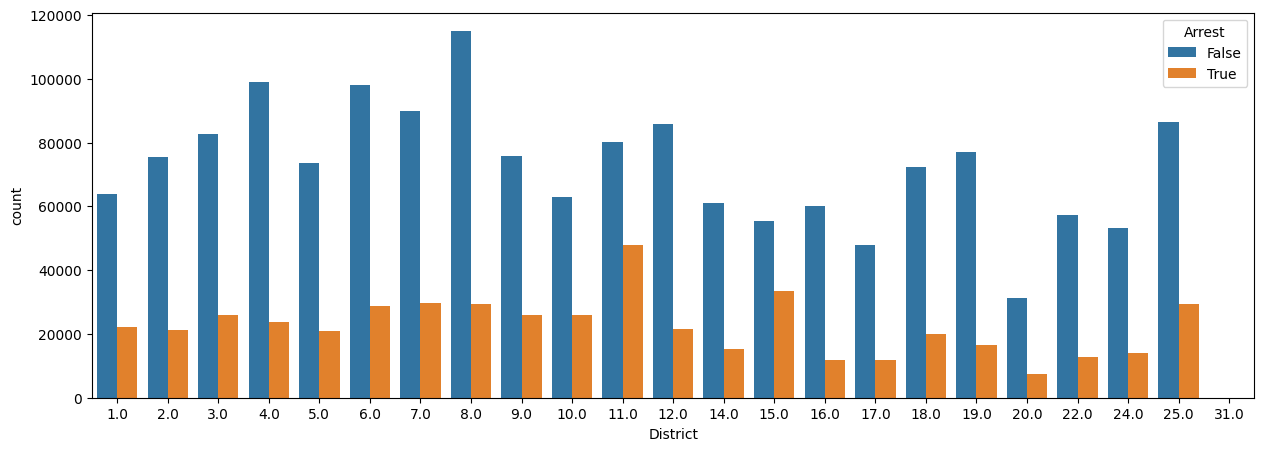

In [55]:
 plt.figure(figsize=(15,5))
sns.countplot(x='District',hue='Arrest',data=df)

.We can observe that, in all the districts the arrest count as False is very much high compared to True.

.We can observe that the highest arrest value as False is highest for district 8.0 and highest True value is for district 11.0. This also indicates the crime is high in the district 8.0

.We can observe that the lowest arrest value as True and false both is district 20.0.. This also indicates the crime is low in district 20.0

In [57]:
df.Description.nunique()

508

In [59]:
df.groupby('Arrest')['Description'].value_counts()

Arrest  Description                                  
False   SIMPLE                                           197327
        DOMESTIC BATTERY SIMPLE                          139304
        $500 AND UNDER                                   130054
        TO VEHICLE                                       119968
        OVER $500                                        118815
                                                          ...  
True    POSSESS - HYPODERMIC NEEDLE                           1
        POSSESS - LOOK-ALIKE DRUGS                            1
        REGISTER FED GAMBLING STAMP                           1
        UNLAWFUL SALE - DELIVERY OF FIREARM AT SCHOOL         1
        UNLAWFUL USE OF BODY ARMOR                            1
Name: Description, Length: 929, dtype: int64

<Axes: >

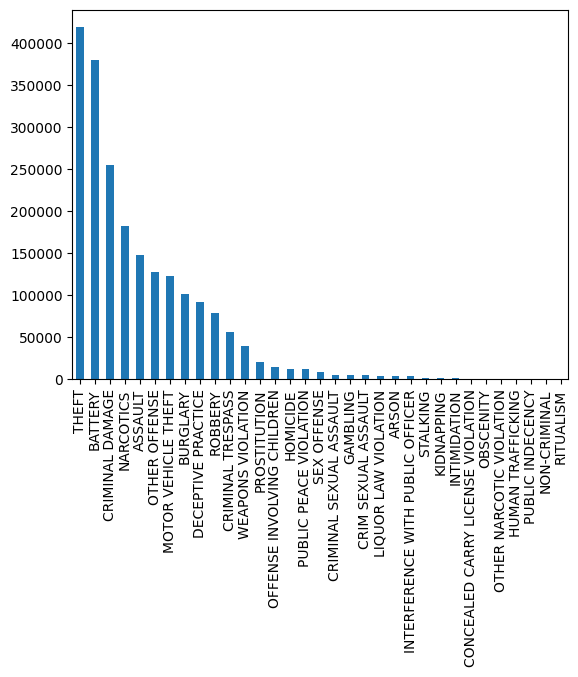

In [63]:
df['Primary Type'].value_counts().plot(kind='bar')

In [90]:
df['Primary Type'].unique()

array(['THEFT', 'BATTERY', 'ASSAULT', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER', 'BURGLARY',
       'NARCOTICS', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL TRESPASS', 'ROBBERY', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'OBSCENITY',
       'CRIM SEXUAL ASSAULT', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'RITUALISM'],
      dtype=object)

.We can observe **THEFT** is the major type of crime followed by **BATTERY** and **CRIMINAL DAMAGES**.

.We can observe that **CONCEALED CARRY LICENSE VIOLATION,OBSCENITY,OTHER NARCOTIC VIOLATION,HUMAN TRAFFICKING,PUBLIC INDECENCY,NON-CRIMINAL,RITUALISM** is almost null.

<Axes: >

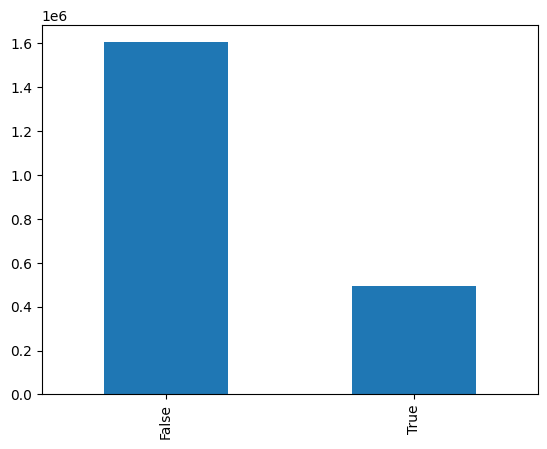

In [66]:
df.Arrest.value_counts().plot(kind='bar')

# Correlation between variables

In [68]:
corr=df.corr()

<ipython-input-68-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

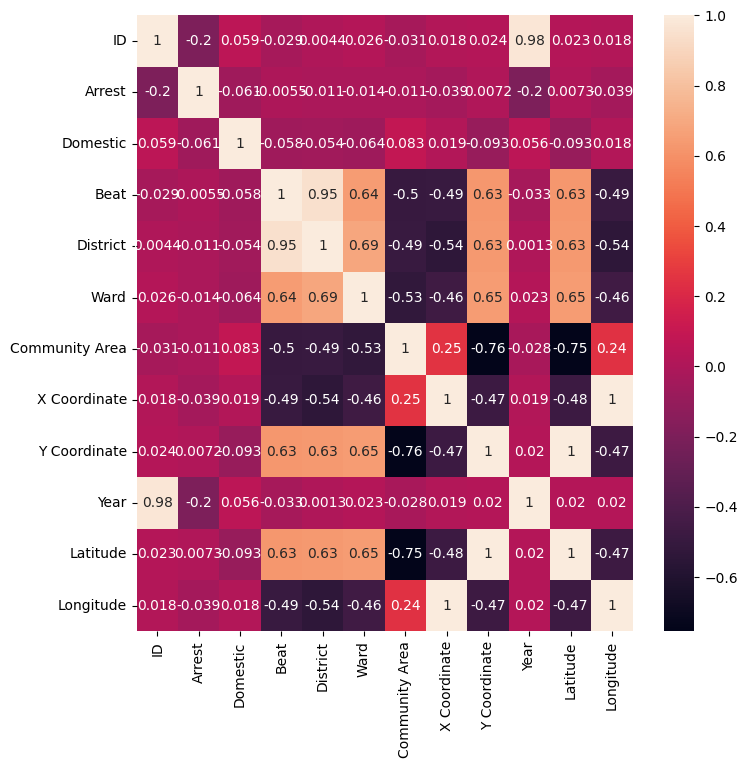

In [91]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

In [73]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [79]:
df['Location Description'].value_counts().head(10)

STREET                            572646
RESIDENCE                         327122
APARTMENT                         275854
SIDEWALK                          192108
OTHER                              50958
ALLEY                              49558
SMALL RETAIL STORE                 41912
VEHICLE NON-COMMERCIAL             37169
PARKING LOT/GARAGE(NON.RESID.)     35910
RESTAURANT                         32485
Name: Location Description, dtype: int64

Text(0.5, 1.0, 'Top 10 Location of Crime')

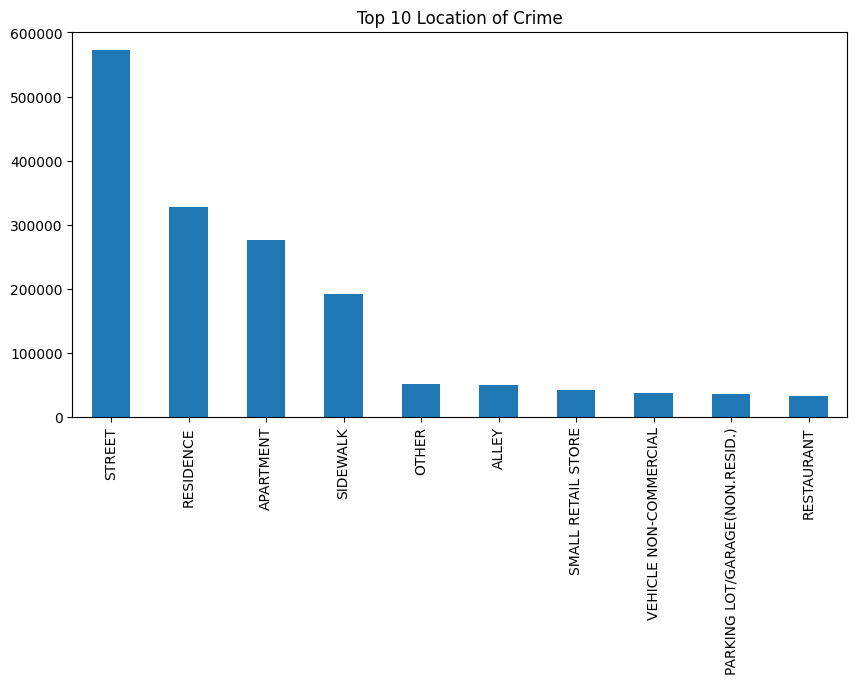

In [92]:
plt.figure(figsize=(10,5))
df['Location Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Location of Crime')

.we can observe the Location where crime rate is highest is street.

In [101]:
Loc_group=df.groupby('Location Description')['Primary Type'].unique().to_frame().reset_index()

In [102]:
Loc_group.head(10)

,Location Description,Primary Type
0,ABANDONED BUILDING,"[CRIMINAL DAMAGE, ASSAULT, BURGLARY, WEAPONS V..."
1,AIRCRAFT,"[PUBLIC PEACE VIOLATION, BATTERY, CRIMINAL TRE..."
2,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,"[THEFT, BATTERY, DECEPTIVE PRACTICE, MOTOR VEH..."
3,AIRPORT BUILDING NON-TERMINAL - SECURE AREA,"[DECEPTIVE PRACTICE, OTHER OFFENSE, THEFT, NAR..."
4,AIRPORT EXTERIOR - NON-SECURE AREA,"[THEFT, BATTERY, ASSAULT, MOTOR VEHICLE THEFT,..."
5,AIRPORT EXTERIOR - SECURE AREA,"[CRIMINAL TRESPASS, THEFT, CRIMINAL DAMAGE, DE..."
6,AIRPORT PARKING LOT,"[BATTERY, THEFT, DECEPTIVE PRACTICE, CRIMINAL ..."
7,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,"[THEFT, BATTERY, NARCOTICS, CRIMINAL DAMAGE, C..."
8,AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,"[DECEPTIVE PRACTICE, THEFT, BATTERY, CONCEALED..."
9,AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA,"[THEFT, PUBLIC PEACE VIOLATION, ASSAULT, CONCE..."
